# Datathon 2024

### 1. Define the problem
Verilerde Girişimcilik Vakfı'nın 2014 yılından itibaren aldığı başvuruları ve Değerlendirme Puanı isimli kolonu gözlemleyebilirsiniz (train.csv). Bu dosyanın içerisinde aynı zamanda başvuran kişilerin anonim olarak paylaşılmış üniversite, aile detayları, ikamet detayları vb. bir çok bilgiyi gözlemleyebilirsiniz.
Bu bilgilerden yola çıkarak 11.049  kişinin değerlendirme puanını tahmin etmek (Regression Problemi)

### 2. Evaluation
Yarışmanın başarısını ölçmek için kullanılacak metrik ise RMSE olacaktır.


### 3. Data 
Veri içerisinde bulunan sütunlar:https : https://www.kaggle.com/competitions/datathon-2024/data


## EDA

In [1]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Datayi getir
train = pd.read_csv('datas/train.csv', low_memory=False)
test = pd.read_csv('datas/test_x.csv', low_memory=False)

In [3]:
# butun columnlara bakmamizi saglar
from IPython import display

pd.set_option('display.max_columns', None)

In [4]:
train.head(2)

,Basvuru Yili,Degerlendirme Puani,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2014,52.0,Erkek,4/6/1994,"Altindag, Ankara",Ankara,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Evet,Bilgisayar Muhendisligi,3,3.50-3,Hayır,Ankara Ataturk Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.50-3,Hayır,NaN,NaN,Üniversite,Hayır,0,Üniversite,Emekli,0,1,Evet,Bilkent IEEE Bilgisayar Toplulugu 2013-2014 Ba...,Evet,Diğer,Hayır,NaN,Evet,Hayır,NaN,NaN,NaN,NaN,0
1,2014,30.0,Erkek,6/11/1993,Üsküdar,İstanbul,İHSAN DOĞRAMACI BİLKENT,Özel,100.0,Hayır,Elektrik Elektronik Mühendisliği,3,3.00-2.50,Hayır,Betül Can Anadolu Lisesi,NaN,Ankara,Anadolu lisesi,MF,NaN,3.00 - 4.00,Hayır,NaN,NaN,Üniversite,Evet,Kamu,Yüksek Lisans / Doktora,Emekli,0,1,Hayır,NaN,Hayır,0,Hayır,NaN,Evet,Evet,Bilkent Cyberparkta bir şirkette Türkiye nin i...,NaN,NaN,NaN,1


In [5]:
test.head(2)

,Basvuru Yili,Cinsiyet,Dogum Tarihi,Dogum Yeri,Ikametgah Sehri,Universite Adi,Universite Turu,Burslu ise Burs Yuzdesi,Burs Aliyor mu?,Bölüm,Universite Kacinci Sinif,Universite Not Ortalamasi,Daha Once Baska Bir Universiteden Mezun Olmus,Lise Adi,Lise Adi Diger,Lise Sehir,Lise Turu,Lise Bolumu,Lise Bolum Diger,Lise Mezuniyet Notu,Baska Bir Kurumdan Burs Aliyor mu?,Burs Aldigi Baska Kurum,Baska Kurumdan Aldigi Burs Miktari,Anne Egitim Durumu,Anne Calisma Durumu,Anne Sektor,Baba Egitim Durumu,Baba Calisma Durumu,Baba Sektor,Kardes Sayisi,Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?,Uye Oldugunuz Kulubun Ismi,Profesyonel Bir Spor Daliyla Mesgul musunuz?,Spor Dalindaki Rolunuz Nedir?,Aktif olarak bir STK üyesi misiniz?,Hangi STK'nin Uyesisiniz?,Stk Projesine Katildiniz Mi?,Girisimcilikle Ilgili Deneyiminiz Var Mi?,Girisimcilikle Ilgili Deneyiminizi Aciklayabilir misiniz?,Ingilizce Biliyor musunuz?,Ingilizce Seviyeniz?,"Daha Önceden Mezun Olunduysa, Mezun Olunan Üniversite",id
0,2023,Kadın,21.06.2002 00:00,Amasya,Amasya,Munzur Üniversitesi,Devlet,NaN,Hayır,Sosyal Hizmet,1,2.50 - 2.99,NaN,Amasya Suluova Şehit Muharrem Saygun Anadolu L...,NaN,Amasya,Devlet,Eşit Ağırlık,NaN,50 - 74,Hayır,-,-,İlkokul,Evet,Özel Sektör,Ortaokul,Evet,Diğer,2.0,Hayır,NaN,Evet,Takım Oyuncusu,Evet,Kızılay da gönüllü dağıtım,NaN,Hayır,-,Evet,NaN,NaN,0
1,2023,Kadın,11.05.2004 00:00,Konya,Konya,Hacettepe Üniversitesi,Devlet,NaN,Hayır,Uluslararası İlişkiler,1,Hazırlığım,NaN,Açık Öğretim Lisesi,NaN,Konya,Devlet,Eşit Ağırlık,NaN,75 - 100,Hayır,-,-,İlkokul,Hayır,-,İlkokul,Evet,Özel Sektör,3.0,Hayır,NaN,Evet,Bireysel Spor,Hayır,-,NaN,Hayır,-,Evet,NaN,NaN,1


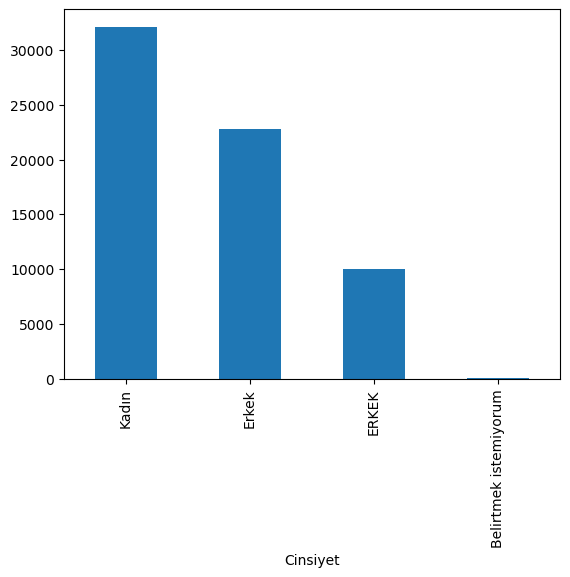

In [6]:
train['Cinsiyet'].value_counts().plot.bar();

In [7]:
# Let's check how much missing value we have
length = len(train)
null_counts = train.isna().sum()
df_null_counts = pd.DataFrame({'Column Name': null_counts.index, 'Null Count': null_counts.values})
df_null_counts = df_null_counts.reset_index(drop=True)
df_null_counts.sort_values(by=['Null Count'], ascending=False, inplace=True)
df_null_counts['Null Count'] = df_null_counts['Null Count']/length # For seeing percentage

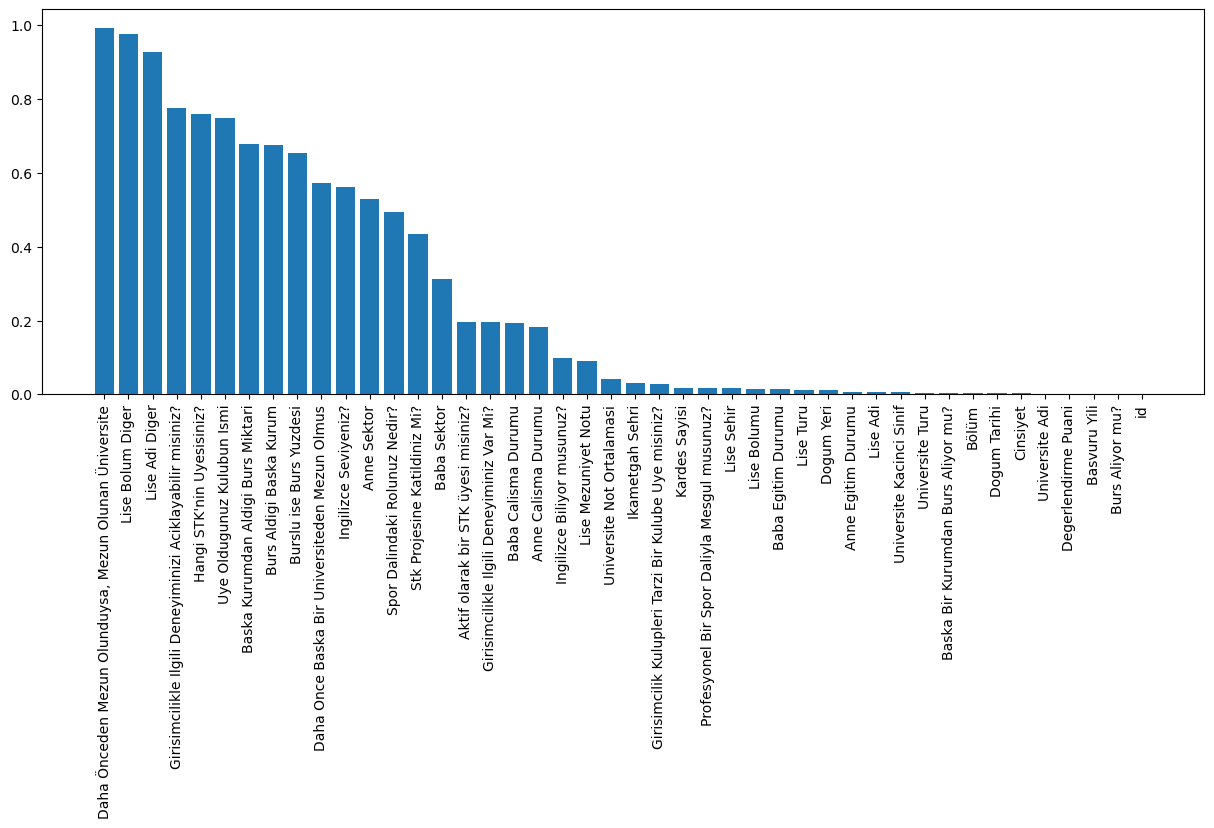

In [8]:
# Let's visulize
fig = plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
plt.bar(df_null_counts['Column Name'], df_null_counts['Null Count']);

In [9]:
train['Dogum Tarihi'].value_counts()

Dogum Tarihi
1/1/70 2:00         1655
1/1/00 0:00          179
1/1/01 0:00          154
1/1/1997             139
1/1/1998             129
                    ... 
1992-05-12             1
1997-03-19             1
1996-08-17             1
1991-04-23             1
12.11.2003 00:00       1
Name: count, Length: 13498, dtype: int64

In [10]:
train['Universite Turu'].value_counts()

Universite Turu
Devlet    37885
DEVLET    15377
Özel       8336
ÖZEL       3272
Name: count, dtype: int64

In [11]:
# Lets concatanite two df to visulize is Universite Turu impact to Degerlendirme puanina
devlet = pd.concat([train[train['Universite Turu'] == 'Devlet'], train[train['Universite Turu'] == 'DEVLET']])    
devlet['Universite Turu'] = 'Devlet'
ozel = pd.concat([train[train['Universite Turu'] == 'Özel'], train[train['Universite Turu'] == 'ÖZEL']])   
ozel['Universite Turu'] = 'Özel'
all = pd.concat([devlet, ozel])

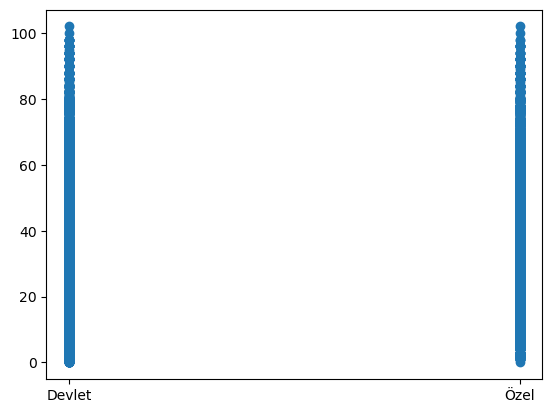

In [12]:
fig = plt.figure()
plt.scatter(x=all['Universite Turu'], y=all['Degerlendirme Puani']);

In [13]:
train[train['Universite Turu'] == 'ÖZEL']['Degerlendirme Puani'].mean(), train[train['Universite Turu'] == 'DEVLET']['Degerlendirme Puani'].mean()

(29.06448655256724, 24.367822071925602)

Boylelikle Universite Turunun buyuk bir etkisi oldugunu gorebiliyoruz

## LowerCase

In [14]:
# lowercase yapilacak columnlari bulalim.
low_yap_train = ['Cinsiyet', 'Dogum Yeri', 'Ikametgah Sehri', 'Universite Adi', 
           'Universite Turu', 'Burs Aliyor mu?', 'Bölüm', 'Lise Adi', 'Lise Adi Diger',
           'Lise Sehir', 'Lise Turu', 'Burs Aldigi Baska Kurum', 'Anne Egitim Durumu',
           'Anne Sektor', 'Baba Calisma Durumu', 'Baba Sektor',
           'Uye Oldugunuz Kulubun Ismi', 'Spor Dalindaki Rolunuz Nedir?']
drop_colm = ['Lise Bolumu', ]

In [15]:
# Lowecase yapan method
def make_lowercase(list_of_low, df):
    for label in list_of_low:
        df[label] = df[label].str.lower()

In [16]:
make_lowercase(low_yap_train, train)

## University Note translate

In [17]:
# Fill the empty note data
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].fillna('missing')

In [18]:
# Universite Notunu duzgun formata uyarlayiniz.
Univertiy_map = {'Ortalama bulunmuyor': 'missing',
                 'ORTALAMA BULUNMUYOR': 'missing',
                 'Not ortalaması yok': 'missing',
                 'Hazırlığım': 'Hazırlığım',
                 '3.50-3': '3.00 - 3.49',
                 '3.00-2.50': '2.50 - 2.99',
                 '2.50 ve altı': '1.80 - 2.49',
                 '3.00 - 4.00': '3.00 - 3.49',
                 '3.50 - 4.00': '3.50 - 4.00',
                 '3.00 - 3.50': '3.00 - 3.49',
                 '2.50 -3.00': '2.50 - 2.99',
                 '4-3.5': '3.50 - 4.00',
                 '2.50 - 3.00': '2.50 - 2.99',
                 '2.00 - 2.50': '1.80 - 2.49',
                 '1.00 - 2.50': '1.80 - 2.49',
                 '4.0-3.5': '3.50 - 4.00',
                 '3.00 - 3.49': '3.00 - 3.49',
                 '2.50 - 2.99': '2.50 - 2.99',
                 '1.80 - 2.49': '1.80 - 2.49',
                 '0 - 1.79': '0 - 1.79',
                 'missing': 'missing'
                }
train['Universite Not Ortalamasi'] = train['Universite Not Ortalamasi'].map(Univertiy_map)

In [19]:
# Visulize test unique values
pd.unique(test['Universite Not Ortalamasi'])

array(['2.50 - 2.99', 'Hazırlığım', '3.00 - 3.49', '1.80 - 2.49',
       '3.50 - 4.00', '0 - 1.79'], dtype=object)

In [20]:
# Visulize train unique values
pd.unique(train['Universite Not Ortalamasi'])

array(['3.00 - 3.49', '2.50 - 2.99', 'missing', '1.80 - 2.49',
       '3.50 - 4.00', 'Hazırlığım', '0 - 1.79'], dtype=object)

In [21]:
train['Universite Not Ortalamasi'].isna().sum()

0

## Spor dalindaki rolunuz nedir kolonunu duzenleme

In [22]:
spor_mapping = {
    'diğer': 'Diğer',
    '0': '-',
    '-': '-',
    'kaptan': 'Lider/Kaptan',
    'kaptan / li̇der': 'Lider/Kaptan',
    'di̇ğer': 'Diğer', 
    'lider/kaptan': 'Lider/Kaptan', 
    'bireysel': 'Bireysel Spor',
    'takım oyuncusu': 'Takım Oyuncusu'
}

In [23]:
train["Spor Dalindaki Rolunuz Nedir?"] = train["Spor Dalindaki Rolunuz Nedir?"].fillna('-')

In [24]:
# Visulize test unique values
pd.unique(test["Spor Dalindaki Rolunuz Nedir?"])

array(['Takım Oyuncusu', 'Bireysel Spor', '-', 'Lider/Kaptan', 'Diğer'],
      dtype=object)

In [25]:
# Visulize train unique values
pd.unique(train["Spor Dalindaki Rolunuz Nedir?"])

array(['diğer', '0', '-', 'kaptan', 'kaptan / li̇der', 'di̇ğer',
       'lider/kaptan', 'bireysel', 'takım oyuncusu'], dtype=object)

In [26]:
test["Spor Dalindaki Rolunuz Nedir?"].isna().sum()

0

In [27]:
train["Spor Dalindaki Rolunuz Nedir?"].isna().sum()

0

In [28]:
train['Spor Dalindaki Rolunuz Nedir?'] = train['Spor Dalindaki Rolunuz Nedir?'].map(spor_mapping)

## Burs aldigi baska kurum duzenleme

In [ ]:
train['Burs Aldigi Baska Kurum']

## Visulazing data

In [29]:
box_plot_columns=["Universite Not Ortalamasi","Burs Aliyor mu?","Lise Mezuniyet Notu","Anne Calisma Durumu",
                  "Baba Calisma Durumu","Girisimcilik Kulupleri Tarzi Bir Kulube Uye misiniz?"
                 ,"Profesyonel Bir Spor Daliyla Mesgul musunuz?","Spor Dalindaki Rolunuz Nedir?","Aktif olarak bir STK üyesi misiniz?",
                  "Stk Projesine Katildiniz Mi?","Girisimcilikle Ilgili Deneyiminiz Var Mi?",
                 "Ingilizce Biliyor musunuz?","Ingilizce Seviyeniz?"]

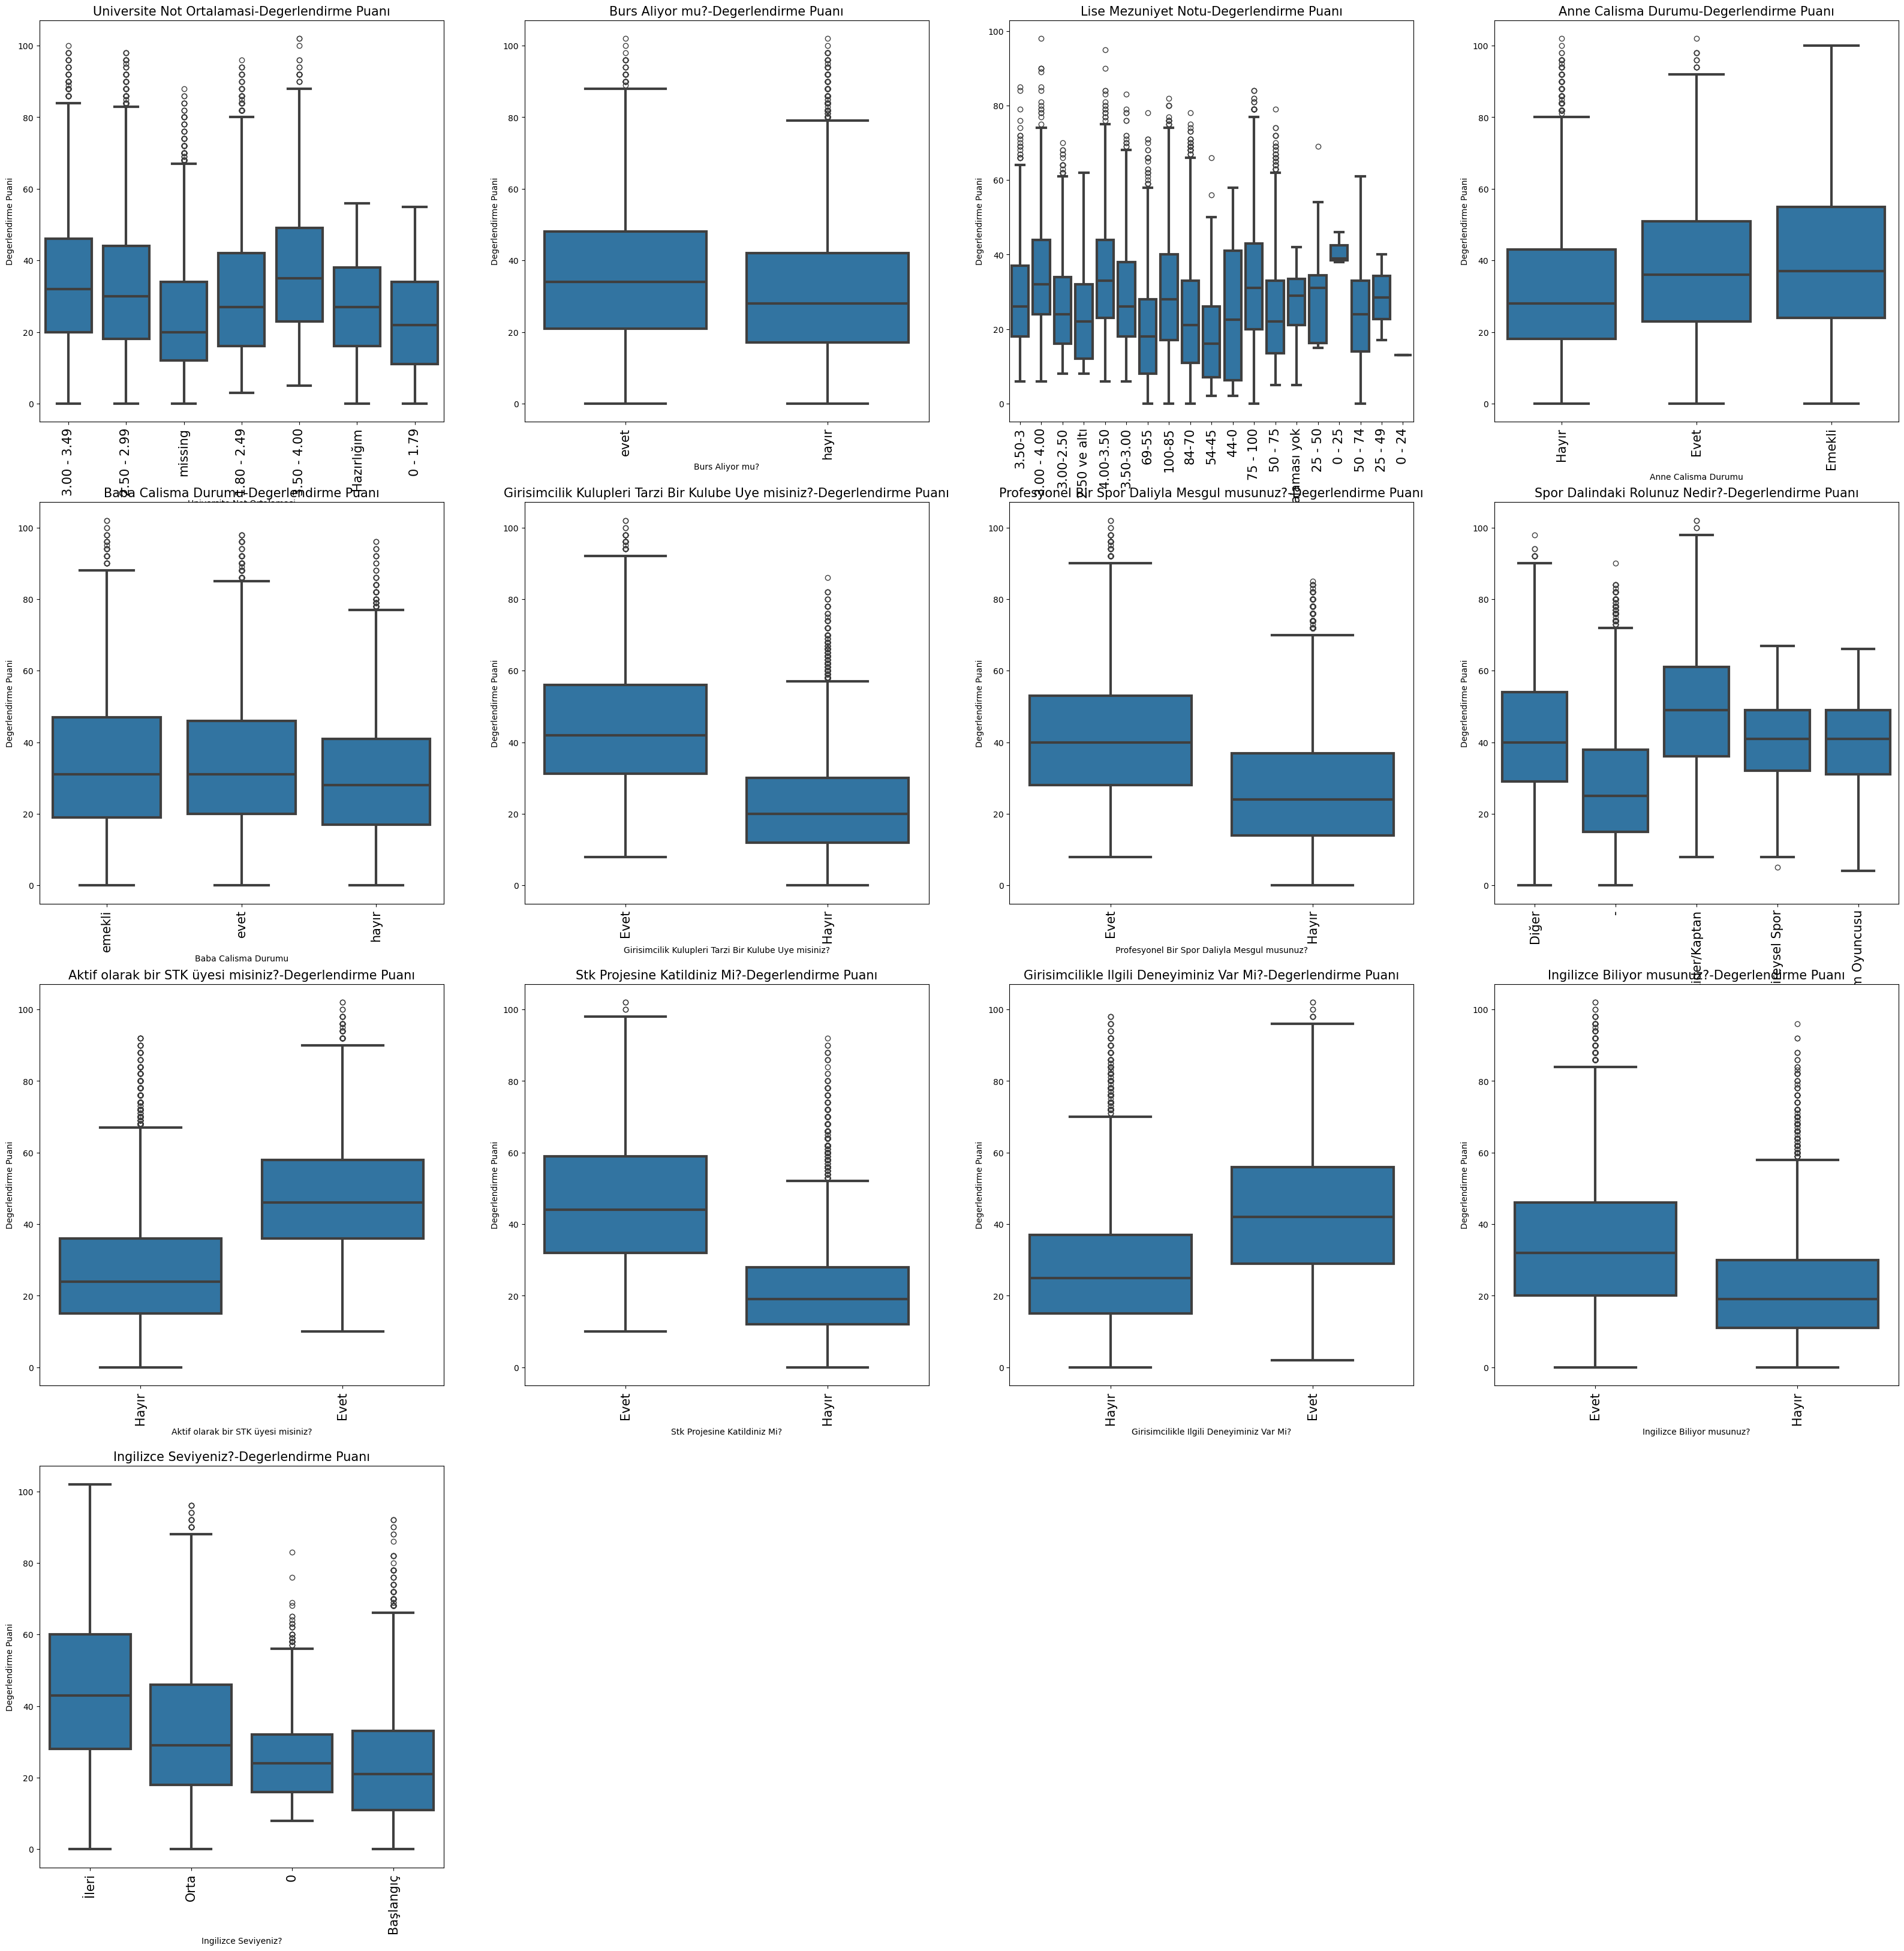

In [30]:
plt.figure(figsize=(40,40))
k=0
for i in box_plot_columns:
    ax=plt.subplot(4,4,k+1)
    k+=1
    ax=sns.boxplot(data=train,x=i,y="Degerlendirme Puani",linewidth=3)
    plt.title(f"{i}-Degerlendirme Puanı",fontsize=15)
    plt.xticks(rotation=90,fontsize=15);

In [31]:
drop_columns = ['Lise Adi Diger', 'Lise Bolum Diger', 'Uye Oldugunuz Klubun Ismi', ]